# 13장 엑셀 파일 다루기

## 13.1 엑셀 파일을 읽고 쓰기

### 엑셀 파일의 데이터 읽기

**[13장: 346페이지]**

In [2]:
!pip install xlrd

In [3]:
import pandas as pd
df = pd.read_excel('학생시험성적.xlsx')
df

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


**[13장: 347페이지]**

In [6]:
pd.read_excel('학생시험성적.xlsx', sheet_name = 1)

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


**[13장: 347페이지]**

In [8]:
pd.read_excel('학생시험성적.xlsx', sheet_name = '2차시험')

,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


**[13장: 347 ~ 348페이지]**

In [9]:
df = pd.read_excel('학생시험성적.xlsx',sheet_name = '2차시험', index_col = 0)
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


In [10]:
df = pd.read_excel('학생시험성적.xlsx', sheet_name = '2차시험', index_col = '학생')
df

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


### 데이터를 엑셀 파일로 쓰기

**[13장: 349페이지]**

In [11]:
import pandas as pd

excel_exam_data1 = {'학생': ['A', 'B', 'C', 'D', 'E', 'F'],
                    '국어': [80, 90, 95, 70, 75, 85],
                    '영어': [90, 95, 70, 85, 90, 95],
                    '수학': [85, 95, 75, 80, 85, 100]}
df1 = pd.DataFrame(excel_exam_data1,columns=['학생','국어','영어','수학'] )
df1

,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,85,95,100


# **[13장: 350페이지]**

In [16]:
!pip install xlsxwriter

In [17]:
excel_writer = pd.ExcelWriter('학생시험성적2.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer, index=False)
excel_writer.save()

**[13장: 351페이지]**

In [19]:
excel_writer2 = pd.ExcelWriter('학생시험성적3.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer2, index=False, sheet_name='중간고사')
excel_writer2.save()

**[13장: 351페이지]**

In [20]:
import pandas as pd

excel_exam_data2 = {'학생': ['A', 'B', 'C', 'D', 'E', 'F'],
                    '국어': [85, 95, 75, 80, 85, 100],
                    '영어': [80, 90, 95, 70, 75, 85],
                    '수학': [90, 95, 70, 85, 90, 95]}
df2 = pd.DataFrame(excel_exam_data2,columns=['학생','국어','영어','수학'] )
df2

,학생,국어,영어,수학
0,A,85,80,90
1,B,95,90,95
2,C,75,95,70
3,D,80,70,85
4,E,85,75,90
5,F,100,85,95


**[13장: 352페이지]**

In [21]:
excel_writer3 = pd.ExcelWriter('학생시험성적4.xlsx', engine='xlsxwriter')
df1.to_excel(excel_writer3, index=False, sheet_name='중간고사')
df2.to_excel(excel_writer3, index=False, sheet_name='기말고사')
excel_writer3.save()

## 13.2 엑셀 파일 통합하기

### 효율적인 데이터 처리를 위한 엑셀 데이터 구조

### 여러 개의 엑셀 파일 데이터를 통합하기********************************************************

**[13장: 355페이지]**

In [39]:
excel_data_files = ['담당자별_판매량_Andy사원.xlsx',
                    '담당자별_판매량_Becky사원.xlsx',
                    '담당자별_판매량_Chris사원.xlsx']

**[13장: 355페이지]**

In [40]:
total_data = pd.DataFrame()

**[13장: 355페이지]**

In [41]:
import pandas as pd

for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df)

total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


**[13장: 356페이지]**

In [42]:
import pandas as pd

total_data = pd.DataFrame()

for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True)

total_data

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


**[13장: 357페이지]**

In [43]:
import glob

glob.glob("담당자별_판매량_*사원.xlsx")

['담당자별_판매량_Andy사원.xlsx', '담당자별_판매량_Becky사원.xlsx', '담당자별_판매량_Chris사원.xlsx']

**[13장: 358페이지]**

In [27]:
import glob
import pandas as pd

excel_data_files1 = glob.glob("담당자별_판매량_*사원.xlsx")
total_data1 = pd.DataFrame()

for f in excel_data_files1:
    df = pd.read_excel(f)
    total_data1 = total_data1.append(df, ignore_index=True)

total_data1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


### 통합 결과를 엑셀 파일로 저장하기

**[13장: 359페이지]**

In [44]:
import glob
import pandas as pd

excel_file_name = '담당자별_판매량_통합.xlsx'

excel_total_file_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data1.to_excel(excel_total_file_writer, index=False, sheet_name='담당자별_판매량_통합')
excel_total_file_writer.save()

glob.glob(excel_file_name)

['담당자별_판매량_통합.xlsx']

## 13.3 엑셀 파일로 읽어온 데이터 다루기

### 데이터를 추가하고 변경하기

**[13장: 360페이지]**

In [46]:
import pandas as pd

df = pd.read_excel('담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


**[13장: 360페이지]**

In [48]:
df.loc[2, '4분기']= 0
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


**[13장: 361페이지]**

In [49]:
df.loc[3, '제품명'] = '벨트'
df.loc[3, '담당자'] = 'A'
df.loc[3, '지역'] = '가'
df.loc[3, '1분기'] = 100
df.loc[3, '2분기'] = 150
df.loc[3, '3분기'] = 200
df.loc[3, '4분기'] = 250

df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198.0,123.0,120.0,137.0
1,구두,A,가,273.0,241.0,296.0,217.0
2,핸드백,A,가,385.0,316.0,355.0,0.0
3,벨트,A,가,100.0,150.0,200.0,250.0


**[13장: 361페이지]**

In [50]:
df['담당자'] = 'Andy'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198.0,123.0,120.0,137.0
1,구두,Andy,가,273.0,241.0,296.0,217.0
2,핸드백,Andy,가,385.0,316.0,355.0,0.0
3,벨트,Andy,가,100.0,150.0,200.0,250.0


**[13장: 362페이지]**

In [51]:
excel_file_name = '담당자별_판매량_Andy사원_new.xlsx'

new_excel_file = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
df.to_excel(new_excel_file, index=False)
new_excel_file.save()

glob.glob(excel_file_name)

['담당자별_판매량_Andy사원_new.xlsx']

### 여러 개의 엑셀 파일에서 데이터 수정하기

**[13장: 363페이지]**

In [52]:
import re

file_name  = '담당자별_판매량_Andy사원.xlsx'

new_file_name = re.sub(".xlsx", "2.xlsx", file_name)
new_file_name

'담당자별_판매량_Andy사원2.xlsx'

**[13장: 363 ~ 364페이지]**

In [55]:
import glob
import re
import pandas as pd

# 원하는 문자열이 포함된 파일을 검색해 리스트를 할당한다.
excel_data_files1 = glob.glob("담당자별_판매량_*사원.xlsx")

# 리스트에 있는 엑셀 파일만큼 반복 수행한다.
for f in excel_data_files1:
    # 엑셀 파일에서 DataFrame 형식으로 데이터 가져온다.
    df = pd.read_excel(f) 
    
    # 특정 열의 값을 변경한다.    
    if(df.loc[1, '담당자']=='A'):
        df['담당자']='Andy'
    elif(df.loc[1, '담당자']=='B'):
        df['담당자']='Becky'
    elif(df.loc[1, '담당자']=='C'):
        df['담당자']='Chris'        
    
    # 엑셀 파일 이름에서 지정된 문자열 패턴을 찾아서 파일명을 변경한다.
    f_new = re.sub(".xlsx", "2.xlsx", f)
    print(f_new)
    
    # 수정된 데이터를 새로운 이름의 엑셀 파일로 저장한다.
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()

담당자별_판매량_Andy사원2.xlsx
담당자별_판매량_Becky사원2.xlsx
담당자별_판매량_Chris사원2.xlsx


**[13장: 364페이지]**

In [56]:
glob.glob("담당자별_판매량_*사원?.xlsx")

['담당자별_판매량_Andy사원2.xlsx', '담당자별_판매량_Becky사원2.xlsx', '담당자별_판매량_Chris사원2.xlsx']

### 엑셀의 필터 기능 수행하기

**[13장: 366페이지]**

In [58]:
import pandas as pd

df = pd.read_excel('담당자별_판매량_통합.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


**[13장: 367페이지]**

In [59]:
df['제품명']

0     시계
1     구두
2    핸드백
3     시계
4     구두
5    핸드백
6     시계
7     구두
8    핸드백
Name: 제품명, dtype: object

**[13장: 367페이지]**

In [60]:
df['제품명'] == '핸드백'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: 제품명, dtype: bool

**[13장: 368페이지]**

In [61]:
handbag = df[df['제품명'] == '핸드백']
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


**[13장: 368페이지]**

In [70]:
import pandas as pd

df = pd.read_excel('담당자별_판매량_통합.xlsx')
handbag1 = df[df['제품명'].isin(['핸드백'])]
handbag1

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


**[13장: 370페이지]**

In [71]:
df[(df['제품명']== '구두') | (df['제품명']== '핸드백')]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


**[13장: 370페이지]**

In [72]:
df[df['제품명'].isin(['구두', '핸드백'])]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


### 조건을 설정해 원하는 행만 선택하기

**[13장: 371페이지]**

In [73]:
df[(df['3분기'] >= 250)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


**[13장: 371페이지]**

In [74]:
df[(df['제품명'] == '핸드백') & (df['3분기'] >= 350)]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392


###  원하는 열만 선택하기

**[13장: 372페이지]**

In [81]:
import pandas as pd

df = pd.read_excel('담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


**[13장: 372페이지]**

In [82]:
df[['제품명','1분기', '2분기','3분기', '4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


**[13장: 373페이지]**

In [83]:
df.iloc[:,[0,3,4,5,6]]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331


**[13장: 373페이지]**

In [84]:
df.iloc[[0,2],:]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
2,핸드백,A,가,385,316,355,331


### 엑셀 데이터 계산하기

**[13장: 375페이지]**

In [85]:
import pandas as pd

df = pd.read_excel('담당자별_판매량_통합.xlsx')

handbag = df[(df['제품명']== '핸드백')]
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


**[13장: 376페이지]**

In [86]:
handbag.sum(axis=1)

2    1387
5    1459
8    1379
dtype: int64

**[13장: 376페이지]**

In [87]:
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns = ['연간판매량'])
handbag_sum

,연간판매량
2,1387
5,1459
8,1379


**[13장: 377페이지]**

In [88]:
handbag_total = handbag.join(handbag_sum)
handbag_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379


**[13장: 378페이지]**

In [89]:
handbag_total.sort_values(by='연간판매량', ascending=True)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
8,핸드백,C,다,365,383,308,323,1379
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459


**[13장: 379페이지]**

In [90]:
handbag_total.sort_values(by='연간판매량', ascending=False)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379


#### 열 데이터의 합계 구하기

**[13장: 380페이지]**

In [91]:
handbag_total.sum()

제품명      핸드백핸드백핸드백
담당자            ABC
지역             가나다
1분기           1100
2분기           1039
3분기           1040
4분기           1046
연간판매량         4225
dtype: object

**[13장: 380페이지]**

In [92]:
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_sum2

,합계
제품명,핸드백핸드백핸드백
담당자,ABC
지역,가나다
1분기,1100
2분기,1039
3분기,1040
4분기,1046
연간판매량,4225


**[13장: 381페이지]**

In [93]:
handbag_total2  = handbag_total.append(handbag_sum2.T)
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,ABC,가나다,1100,1039,1040,1046,4225


**[13장: 381페이지]**

In [94]:
handbag_total2.loc['합계', '제품명'] = '핸드백'
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


**[13장: 381 ~ 382페이지]**

In [96]:
import pandas as pd

# 엑셀 파일을 pandas의 DataFrame 형식으로 읽어온다.
df = pd.read_excel('담당자별_판매량_통합.xlsx')

# 제품명 열에서 핸드백이 있는 행만 선택한다.
product_name = '핸드백'
handbag = df[(df['제품명']== product_name)]

# 행별로 합계를 구하고 마지막 열 다음에 추가한다.
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns = ['연간판매량'])
handbag_total = handbag.join(handbag_sum)

# 열별로 합해 분기별 합계와 연간판매량 합계를 구하고 마지막 행 다음에 추가한다.
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_total2  = handbag_total.append(handbag_sum2.T)

# 지정된 항목의 문자열을 변경한다.
handbag_total2.loc['합계', '제품명'] = product_name
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

# 결과를 확인한다.
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


## 13.4 엑셀 데이터의 시각화


### 그래프를 엑셀 파일에 넣기

**[13장: 384페이지]**

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간': [9, 10, 11, 12, 13, 14, 15],
         '제품1': [10, 15, 12, 11, 12, 14, 13],
         '제품2': [9, 11, 14, 12, 13, 10, 12]}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df.index.name = '시간' #index 라벨 추가

df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


**[13장: 385페이지]**

FileNotFoundError: [Errno 2] No such file or directory: 'C:/myPyCode/figures/fig_for_excel1.png'

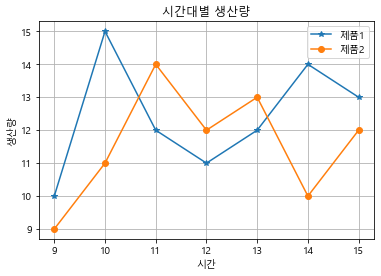

In [98]:
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid = True, style = ['-*', '-o'], title='시간대별 생산량')
product_plot.set_ylabel("생산량")

image_file = 'C:/myPyCode/figures/fig_for_excel1.png' # 이미지 파일 경로 및 이름
plt.savefig(image_file, dpi = 400) # 그래프를 이미지 파일로 저장

plt.show()

**[13장: 386페이지]**

In [100]:
import pandas as pd

# (1) pandas의 ExcelWriter 객체 생성
excel_file = 'data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크시트(worksheet) 객체 생성
worksheet = excel_writer.sheets['Sheet1']

# (4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', image_file, {'x_scale': 0.7, 'y_scale': 0.7})
# worksheet.insert_image(1, 3, image_file, {'x_scale': 0.7, 'y_scale': 0.7})

# (5) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

### 엑셀 차트 만들기

**[13장: 388 ~ 389페이지]**

In [101]:
# (1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('data_chart_in_excel.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정 
chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

**[13장: 390페이지]**

In [102]:
# (5) 차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1',})

chart.add_series({'values': '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1',})

**[13장: 390페이지]**

In [103]:
# (5-1) 엑셀 차트에 x, y축 라벨과 제목 추가
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

**[13장: 391 ~ 392페이지]**

In [106]:
# (1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('data_chart_in_excel2.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성 (원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})

# (5-1) 엑셀 차트에 x, y축 라벨과 제목 추가
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7)  ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

## 13.5 정리